# HSV Conversion and Segmentation
This notebook explores the HSV color model, channel manipulation, and demonstrates HSV-based segmentation for isolating specific colors under varying illumination.

In [1]:
import sys
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../../'))

from src.color_utils import bgr_to_hsv, hsv_to_bgr
from src.visualization import compare_results, show_image
from src.image_processing import segment_color

%matplotlib inline

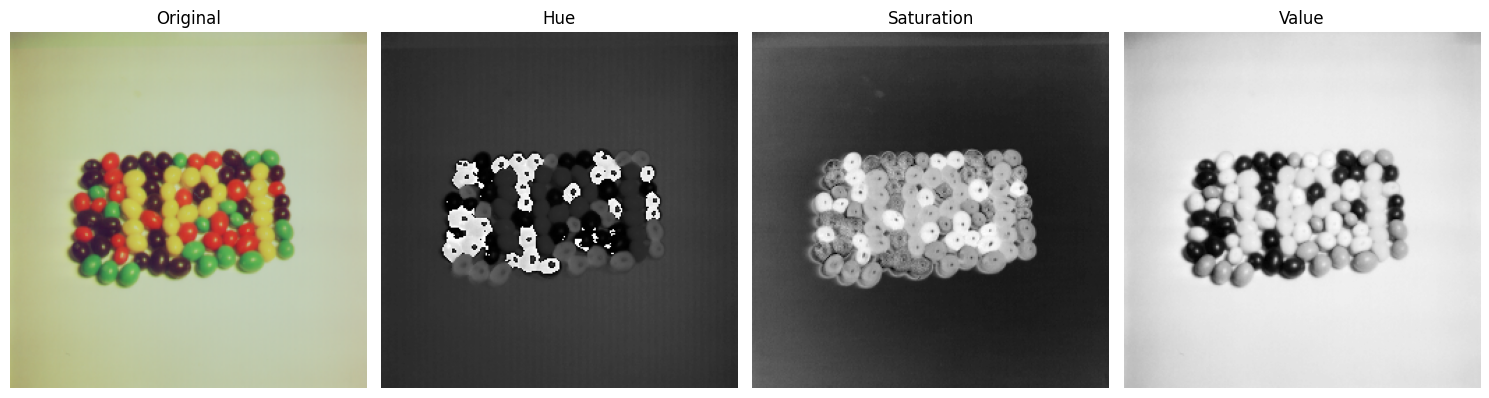

In [ ]:
beans = cv2.imread('../../images/input/beans.tiff')

beans_hsv = bgr_to_hsv(beans)

h, s, v = cv2.split(beans_hsv)

compare_results([beans, h, s, v], ["Original", "Hue", "Saturation", "Value"])

## HSV Channel Decomposition
Splitting the HSV channels to observe how hue, saturation, and value contribute independently.

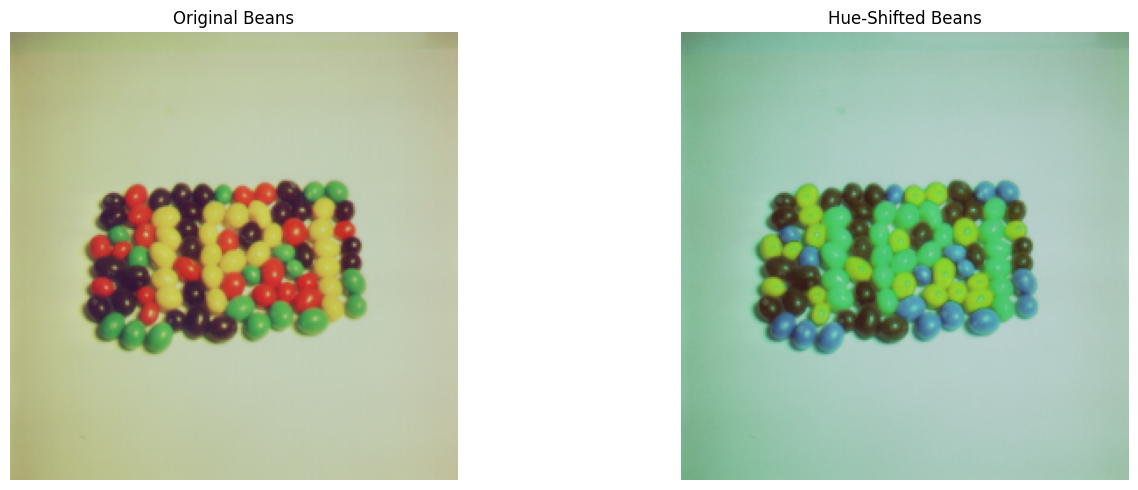

In [ ]:
h_shifted = (h.astype(np.int16) + 40) % 180
h_shifted = h_shifted.astype(np.uint8)

shifted_hsv = cv2.merge([h_shifted, s, v])
shifted_beans = hsv_to_bgr(shifted_hsv)

compare_results([beans, shifted_beans], ["Original Beans", "Hue-Shifted Beans"])

## Hue Manipulation
Shifting the hue channel to demonstrate perceptual color changes.

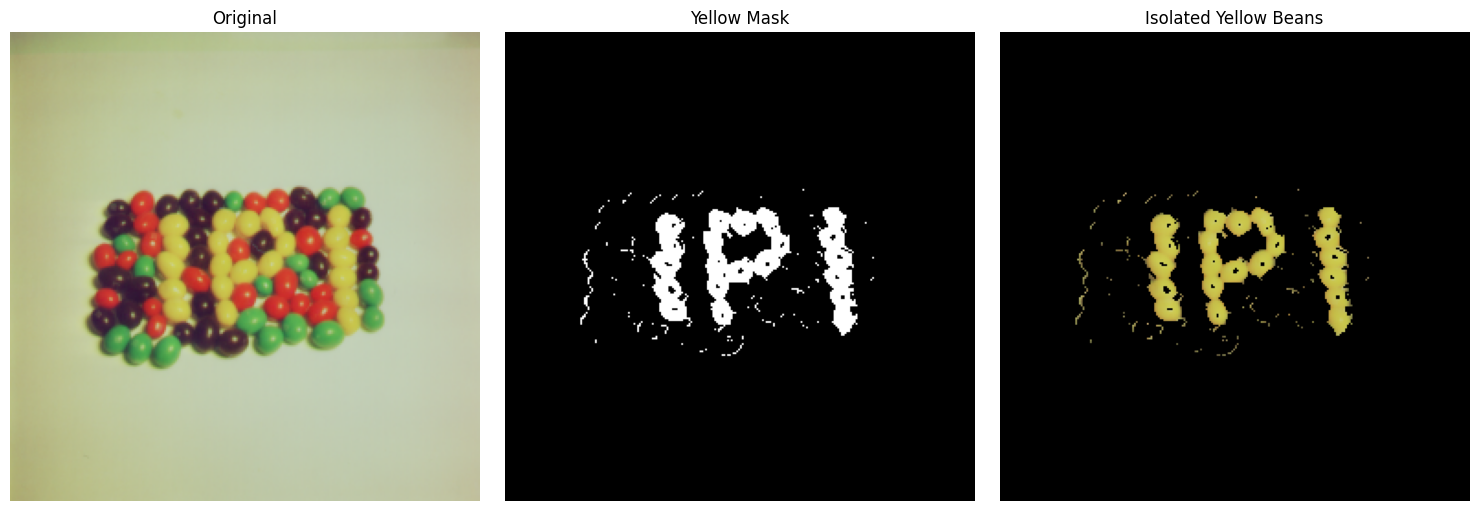

In [ ]:
lower_yellow = [20, 100, 100]
upper_yellow = [30, 255, 255]

mask = segment_color(beans_hsv, lower_yellow, upper_yellow)

segmented_yellow = cv2.bitwise_and(beans, beans, mask=mask)

compare_results([beans, mask, segmented_yellow], ["Original", "Yellow Mask", "Isolated Yellow Beans"])

## Color Segmentation: Yellow Beans
Using HSV ranges to isolate yellow-colored beans from the image.

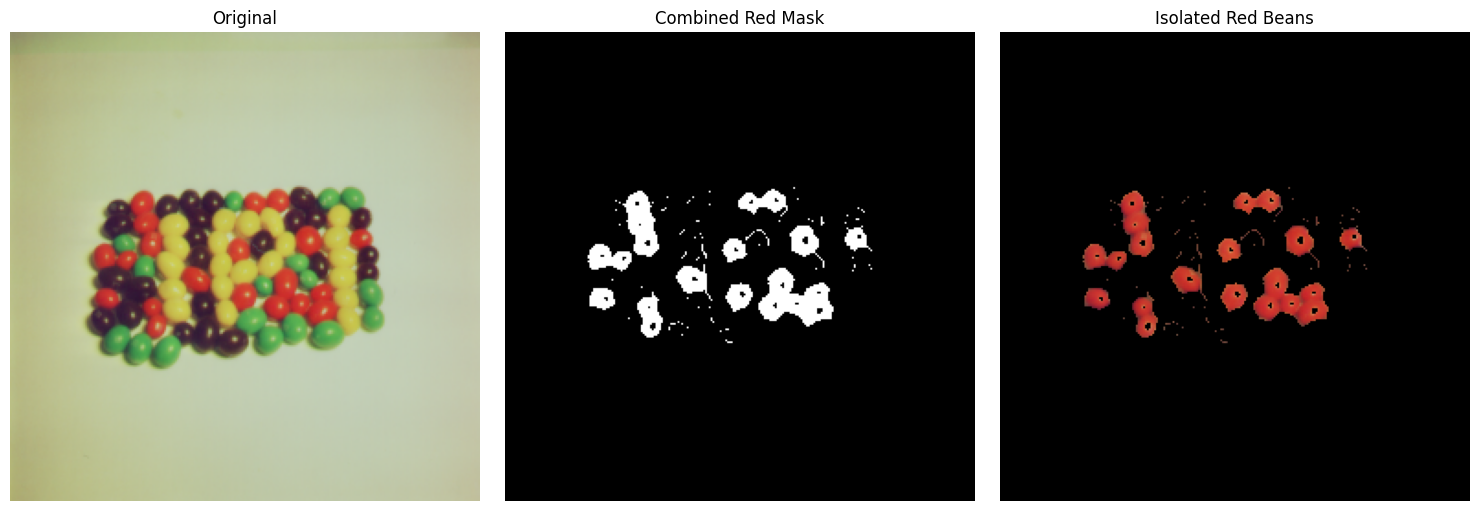

In [ ]:
lower_red1 = [0, 100, 100]
upper_red1 = [10, 255, 255]

lower_red2 = [160, 100, 100]
upper_red2 = [179, 255, 255]

mask1 = segment_color(beans_hsv, lower_red1, upper_red1)
mask2 = segment_color(beans_hsv, lower_red2, upper_red2)

full_red_mask = cv2.bitwise_or(mask1, mask2)
segmented_red = cv2.bitwise_and(beans, beans, mask=full_red_mask)

compare_results([beans, full_red_mask, segmented_red], ["Original", "Combined Red Mask", "Isolated Red Beans"])

## Red Bean Segmentation (Multi-Range)
Red wraps around the hue circle, so we combine two ranges to capture all red tones.

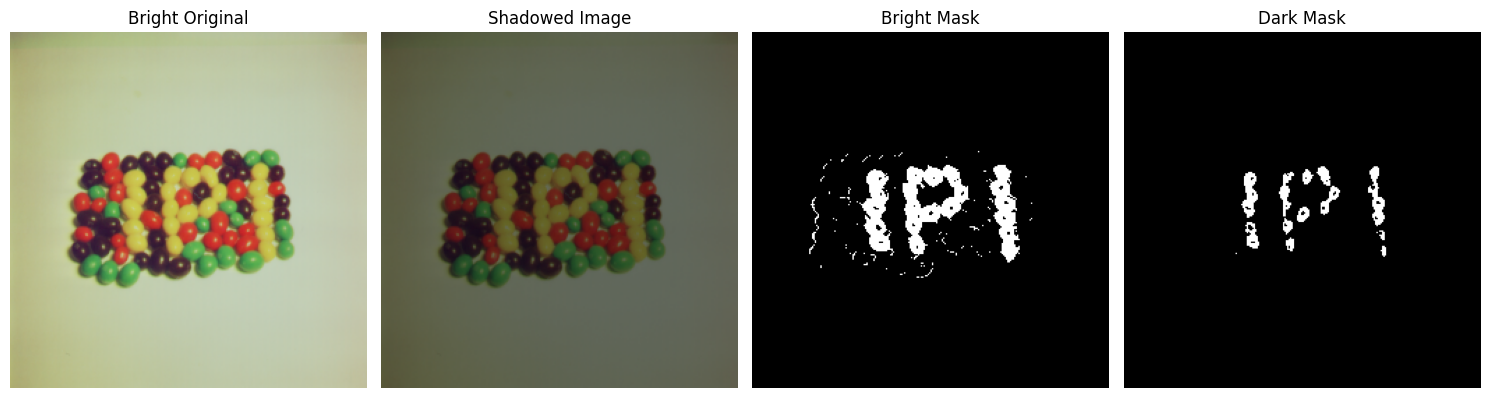

In [ ]:
beans_dark = beans_hsv.copy()
beans_dark[:, :, 2] = beans_dark[:, :, 2] // 2

dark_beans_bgr = hsv_to_bgr(beans_dark)
mask_on_dark = segment_color(beans_dark, lower_yellow, upper_yellow)

compare_results([beans, dark_beans_bgr, mask, mask_on_dark], 
                ["Bright Original", "Shadowed Image", "Bright Mask", "Dark Mask"])

## Illumination Robustness Test
Comparing segmentation performance under reduced brightness to validate HSV advantages.